## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

## Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


## Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 
<code>from sklearn.metrics import r2_score
r2_score(y_test, y_pred)</code>

 - where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
 - Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

### The steps we will follow in this exercise are as follows.

1. Reading, understanding and visualising the data.
2. Preparing the data for modeling(train-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on test set

## Step 1: Reading, Understanding and visualizing the data

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [308]:
bikes=pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [309]:
bikes.shape

(730, 16)

In [310]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


1.1 Check if there are any missing values in dataframe

In [311]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Dropping variables which don't play any importent role in analysis.
 - "dteday" Already have year and month
 - "temp" atemp and temp have high correlation so dropping one of them
 - "casual" and "registered" also don't play any importent role in analysis, We already have cnt(total demand)
 - "instant" no need of index for this column

In [312]:
bikes.temp.corr(bikes.atemp)

0.9916961786905648

In [313]:
bikes=bikes.drop(['instant','dteday','casual','registered','temp'],axis=1)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


### Lets start visualizing the data and check In Linear Regression Model cnt(Dependent/target variable) in some way dependent on any other (independent/predictor) variable.

#### Before visualizing the data first of all convert all variables like season, holiday etc to categorical variable. They contains values which have numeric type but actually they are categorical.

In [314]:
bikes[['season','yr','mnth','holiday','weekday','workingday','weathersit']]=bikes[['season','yr','mnth','holiday','weekday','workingday','weathersit']].astype('category')

In [315]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.3 KB


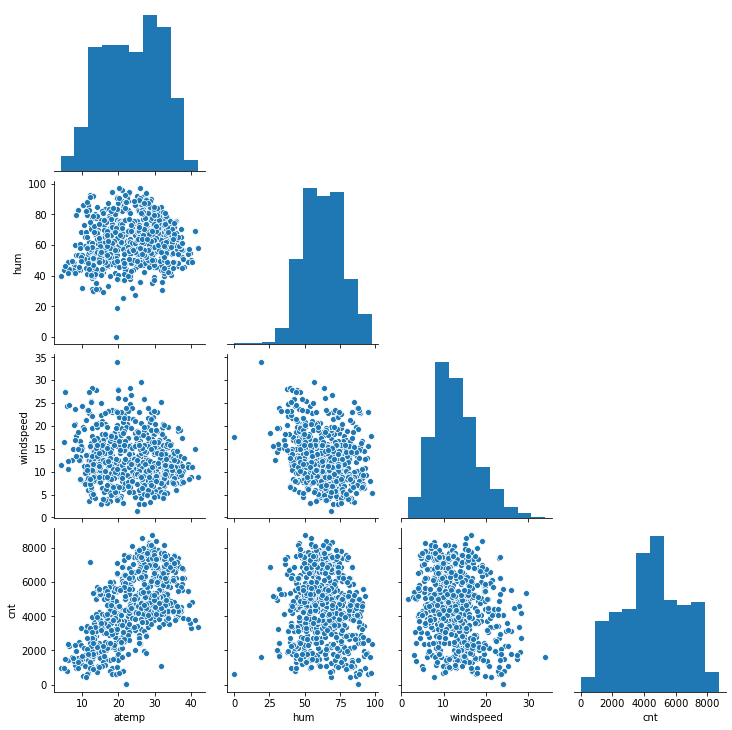

In [316]:
#visualizing the numerical variable
sns.pairplot(bikes,x_vars=["atemp", "hum","windspeed","cnt"],
    y_vars=[ "atemp","hum","windspeed","cnt"],corner=True)
plt.show()

### Look at atemp & cnt scatter plot. There is some sort of positive correlation. Which means that some of the variance in cnt is explained by atemp.

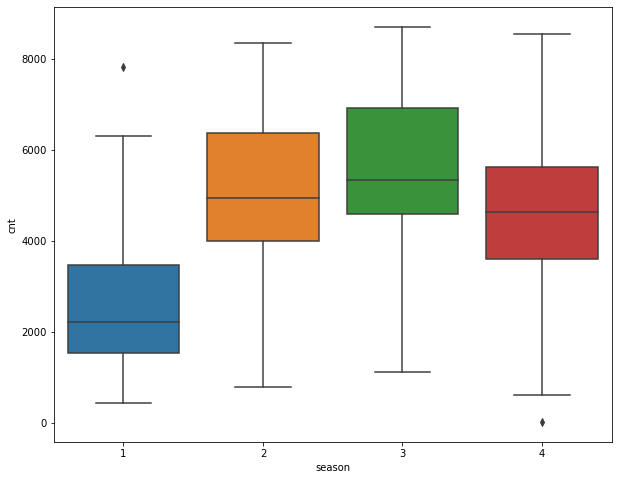

In [317]:
#Lets visualizing the categorial variable
plt.figure(figsize=(10,8))
sns.boxplot(x='season',y='cnt',data=bikes)
plt.show()

### From above boxplot we can have a note that in fall, summer and winter demand is high whilein spring its down. It means season have good impact on our bikes demand

### Lets create box plot for all categorical variables

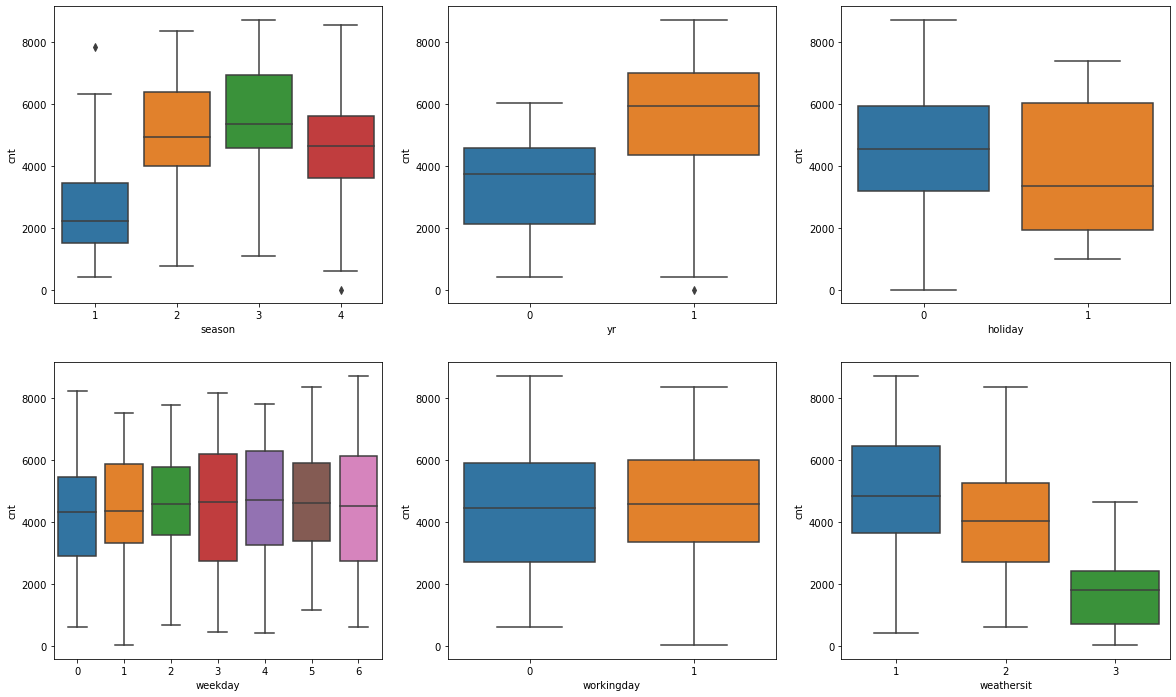

In [318]:
#visualising all box plot with below codes
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data =bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

### From above canvas of boxplot we can have basic idea that in year 2019 demand is high, not_holiday time demands is also high etc.

### Note
If model tells you about that atemp and yr are importent variable in cnt prediction then you are comfrotable with these plots and have a cross check for your analysis

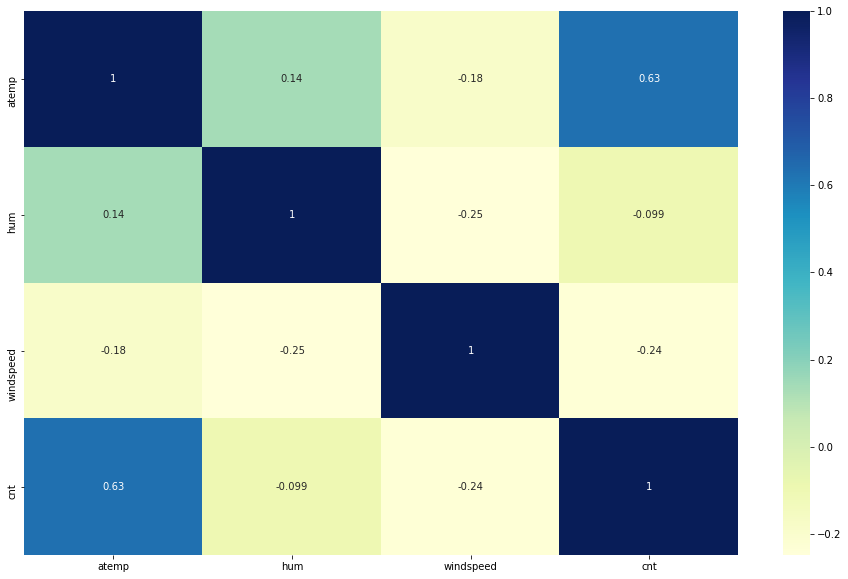

In [319]:
plt.figure(figsize=(16,10))
sns.heatmap(bikes.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Step 2: Preparing the data for Modeling

- Encoding:
    - Converting binary categorical variables to one and zeros    
    - Converting other categorical variables to dummy variables
- Spliting into train and test
- Rescaling of variables

### Lets replace these numeric values to categorical(human readable) values. Check Dictionary for better understading. 

#### This will help us to understand my dataset better at the time or prediction.

In [321]:
# Season have 1:spring, 2:summer, 3:fall, 4:winter
bikes.season=bikes.season.replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'])

In [322]:
# year (0: 2018, 1:2019)
bikes.yr=bikes.yr.replace([0, 1], ['yr_2018', 'yr_2019'])

In [323]:
# Month from 1 to 12 represent Jan to Dec respectively
bikes.mnth=bikes.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [324]:
# Weekday from 1 to 6 represent Monday to Sunday respectively
bikes.weekday=bikes.weekday.replace([0,1,2,3,4,5,6], ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [325]:
# If day is neither weekend nor holiday is 1, otherwise is 0. Reatin it as usual. no impact on analysis.
# Header define their readability
bikes.workingday=bikes.workingday.replace([1, 0], ['working_day', 'not_working_day'])

In [326]:
# weather day is a holiday or not. Reatin it as usual. no impact on analysis
#header define their readability
bikes.holiday=bikes.holiday.replace([0, 1], ['not_holiday', 'holiday'])

In [327]:
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy,
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikes.weathersit=bikes.weathersit.replace([1, 2, 3,4], ['Clear', 'Mist','Light Snow','Heavy Rain'])

### Now lets look our data set, how it looks like

In [328]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,yr_2018,Jan,not_holiday,Sunday,not_working_day,Mist,18.18125,80.5833,10.749882,985
1,spring,yr_2018,Jan,not_holiday,Monday,not_working_day,Mist,17.68695,69.6087,16.652113,801
2,spring,yr_2018,Jan,not_holiday,Tuesday,working_day,Clear,9.47025,43.7273,16.636703,1349
3,spring,yr_2018,Jan,not_holiday,Wednesday,working_day,Clear,10.60610,59.0435,10.739832,1562
4,spring,yr_2018,Jan,not_holiday,Thursday,working_day,Clear,11.46350,43.6957,12.522300,1600


In [329]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


In [330]:
bikes.describe()

,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849
std,8.150308,14.237589,5.195841,1936.011647
min,3.953480,0.000000,1.500244,22.000000
25%,16.889713,52.000000,9.041650,3169.750000
50%,24.368225,62.625000,12.125325,4548.500000
75%,30.445775,72.989575,15.625589,5966.000000
max,42.044800,97.250000,34.000021,8714.000000


### Run a for loop to add dummy variables, drop redundant dummy variable and then drop unnecessory variable used for dummy variable creation

In [331]:
# Lets start a process to create dummys and drop variable which are not required for further analysis
col_list =  ['season', 'yr','mnth', 'holiday', 'weekday', 'workingday','weathersit']
for col in col_list:
    # add dummy variables and dropping a redundent dummy variables
    status=pd.get_dummies(bikes[col],drop_first=True)
    # concat the dummy df with the original data
    bikes=pd.concat([bikes,status],axis=1)
    #Dropping actaul variable
    bikes=bikes.drop(col,axis=1)

In [332]:
bikes.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,Aug,Dec,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,Light Snow,Mist
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [333]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   atemp        730 non-null    float64
 1   hum          730 non-null    float64
 2   windspeed    730 non-null    float64
 3   cnt          730 non-null    int64  
 4   spring       730 non-null    uint8  
 5   summer       730 non-null    uint8  
 6   winter       730 non-null    uint8  
 7   yr_2019      730 non-null    uint8  
 8   Aug          730 non-null    uint8  
 9   Dec          730 non-null    uint8  
 10  Feb          730 non-null    uint8  
 11  Jan          730 non-null    uint8  
 12  July         730 non-null    uint8  
 13  June         730 non-null    uint8  
 14  March        730 non-null    uint8  
 15  May          730 non-null    uint8  
 16  Nov          730 non-null    uint8  
 17  Oct          730 non-null    uint8  
 18  Sep          730 non-null    uint8  
 19  not_holi

## Splitting the Data into Training and Testing Sets

In [334]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Why we should do rescaling
#### Scaling should be done on numeric values where numeric values in different column are on very different scale. For example windspeed have number values like 10, 11 etc while cnt have values like 700,8000 etc. 

### We are using MinMax Scaller because it will take care of Outliers by default

In [335]:
# Creating and instance of MinMax Scaller
scaler = MinMaxScaler()

In [336]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Create a list of all numeric variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,Aug,Dec,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,Light Snow,Mist
653,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
576,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
728,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
482,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [337]:
df_train.describe()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,Aug,Dec,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,Light Snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,...,0.974510,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.676471,0.029412,0.343137
std,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,...,0.157763,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Now You can check that all values lies between 0 and 1 and max values are 1 for all. While in all previous decribe() function result we have very different values

## Step 3: Training the Model

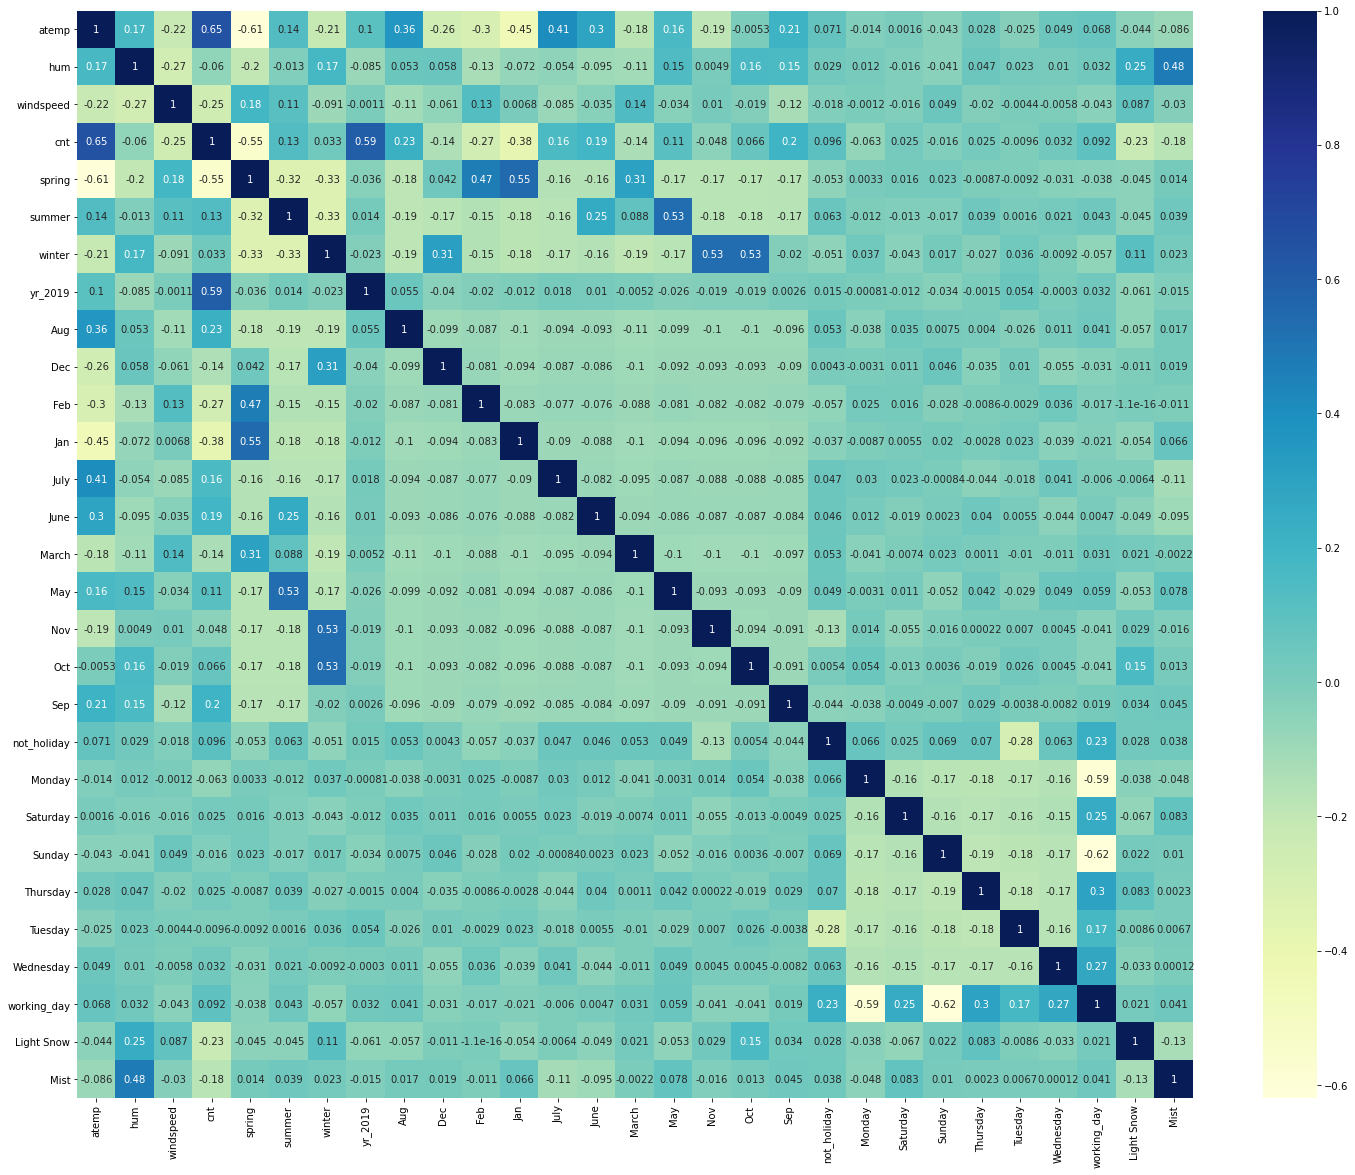

In [338]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [339]:
# y_train is your dataframe apart from the column cnt(We will predict this column from X_train actually)
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [340]:
# We already imported RFE and LinearRegression

In [341]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [342]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('yr_2019', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('March', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('not_holiday', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 11),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10),
 ('working_day', False, 2),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [343]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'spring', 'winter', 'yr_2019', 'Dec',
       'Jan', 'July', 'Nov', 'Sep', 'not_holiday', 'Sunday', 'Light Snow',
       'Mist'],
      dtype='object')

In [344]:
X_train.columns[~rfe.support_]

Index(['summer', 'Aug', 'Feb', 'June', 'March', 'May', 'Oct', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'working_day'],
      dtype='object')

In [345]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [346]:
X_train_rfe.shape

(510, 15)

In [347]:
# Already imported statsmodels.api as sm  
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [348]:
# Lets Run the linear model and see the summary 
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.67e-187
Time:                        12:33:02   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2821      0.041      6.855      

### From above summery we can get that there is a variable which have greater than 0.05 p-value(5% significance level)

### Lets Drop "Sunday"

In [349]:
X_train_new = X_train_rfe.drop(["Sunday"], axis = 1)

### Now rebuilding the model again 

In [350]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the Model
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.58e-187
Time:                        12:33:06   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2834      0.041      6.877      

### Now we have p-value which is less than 0.05(5% significance level)

### Lets look at VIF

In [351]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [352]:
# Calculate the VIFs for the new model
# variance_inflation_factor import is already done.
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,30.74
11,not_holiday,24.42
0,atemp,19.32
2,windspeed,4.56
3,spring,3.07
4,winter,2.98
13,Mist,2.29
5,yr_2019,2.08
9,Nov,1.79
7,Jan,1.77


### Now we have OLS Regression Results and VIF value to supplement OLS Result. So which variable should we remove which have highest VIF(bedroom) or semi-furnished which have very low coffecients and high p-value? ????

We could have
- High p-value, high VIF(will drop it)
- High - Low
    - High p-value, low VIF (remove it)
    - Low p-value, high VIF (we should not remove this variable. because when we remove above one VIF will change.)
- Low p-value, low VIF(Will keep it)

### So from above concept we will remove hum first. when we remove hum VIF values will change for others.

In [353]:
X_train_new=X_train_new.drop('hum',axis=1)
X_train_new.head()

,atemp,windspeed,spring,winter,yr_2019,Dec,Jan,July,Nov,Sep,not_holiday,Light Snow,Mist
653,0.501133,0.300794,0,1,1,0,0,0,0,0,1,0,0
576,0.766351,0.264686,0,0,1,0,0,1,0,0,1,0,0
426,0.438975,0.255342,1,0,1,0,0,0,0,0,1,0,1
728,0.200348,0.663106,1,0,1,1,0,0,0,0,1,0,0
482,0.391735,0.188475,0,0,1,0,0,0,0,0,1,0,1


In [354]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the Model
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.95e-185
Time:                        12:33:17   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2050      0.037      5.590      

In [355]:
X_train_new = X_train_lm.drop(['const'], axis=1)

In [356]:
# Calculate the VIFs for the new model
# variance_inflation_factor import is already done.
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,not_holiday,19.91
0,atemp,13.15
1,windspeed,4.54
2,spring,2.85
3,winter,2.77
4,yr_2019,2.07
8,Nov,1.78
6,Jan,1.71
12,Mist,1.58
5,Dec,1.51


In [357]:
X_train_new=X_train_new.drop('not_holiday',axis=1)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the Model
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.75e-184
Time:                        12:33:18   Log-Likelihood:                 493.82
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     497   BIC:                            -906.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2926      0.026     11.261      0.0

In [358]:
# Calculate the VIFs for the new model
# variance_inflation_factor import is already done.
X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,4.57
1,windspeed,3.95
3,winter,2.55
2,spring,2.34
4,yr_2019,2.06
8,Nov,1.77
6,Jan,1.65
11,Mist,1.53
5,Dec,1.46
7,July,1.35


### Now look at VIF. No variable have VIF greater than 5 which is pretty good.(Few people takes VIF 2 rather than 5 as good VIF)

### Now also look at p-value.  There is no variable which have p-value > 0.05. Which means significance level 5% remember p-value from hypothesis testing.

### This is also pretty good thing.

## Step 4: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [359]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

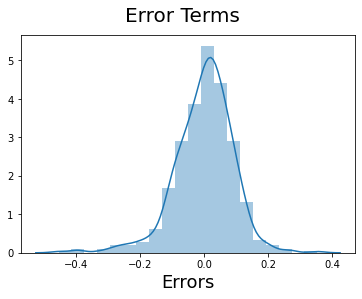

In [360]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

#### Applying the scaling on the test sets

In [361]:
#create a list of numerical vars
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [362]:
df_test.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,Aug,Dec,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,Light Snow,Mist
184,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
535,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
299,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
221,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
152,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [363]:
df_test.describe()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,Aug,Dec,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,Light Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,...,0.963470,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.698630,0.027397,0.319635
std,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,...,0.188034,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.459904,0.163612,0.467403
min,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### check there is one difference between max value of train and test set. Max value were 1 for train set while in test set this varry. 

#### Dividing into X_test and y_test

In [364]:
# y_test is your dataframe apart from the column cnt(We will predict this column from X_test actually)
y_test=df_test.pop('cnt')
X_test=df_test

In [365]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   atemp       510 non-null    float64
 1   windspeed   510 non-null    float64
 2   spring      510 non-null    uint8  
 3   winter      510 non-null    uint8  
 4   yr_2019     510 non-null    uint8  
 5   Dec         510 non-null    uint8  
 6   Jan         510 non-null    uint8  
 7   July        510 non-null    uint8  
 8   Nov         510 non-null    uint8  
 9   Sep         510 non-null    uint8  
 10  Light Snow  510 non-null    uint8  
 11  Mist        510 non-null    uint8  
dtypes: float64(2), uint8(10)
memory usage: 16.9 KB


### Now let's use our model to make predictions.


In [366]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [367]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [368]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

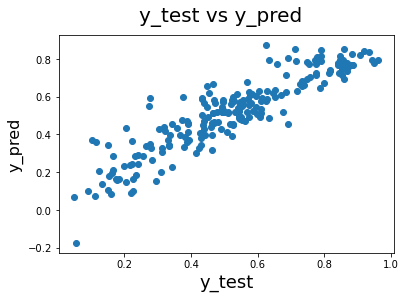

In [369]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [370]:
#evaluate
r2_score(y_true=y_test,y_pred=y_pred)

0.8179598345919716

Now r2score for train set is 0.83(Check OLS summary) and for y_pred is 0.81. Its pretty reasonable.

So what model have learned on training set is able generalize on test set. 

### cnt= 0.2926 + 0.4109 X atemp  - 0.1430 X windspeed - 0.1122 X spring + 0.0580 X winter + 0.2361 X yr_2019 - 0.0539  X Dec - 0.0572 X Jan - 0.0588 X July - 0.0576  X Nov + 0.0518 X Sep - 0.2881 X Light Snow - 0.0804 X Mist